In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names=['sepal-length', 'sepal-width', 'prtal-length', 'petal-width', 'class']
dataset=pd.read_csv(url,names=names)

In [48]:
dataset.head()

,sepal-length,sepal-width,prtal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

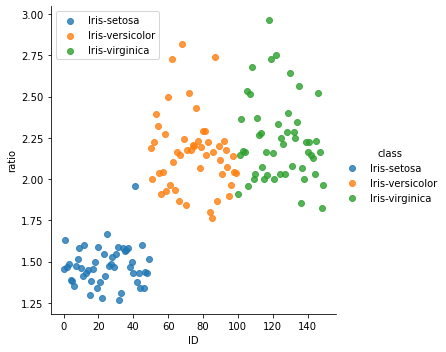

In [50]:
import seaborn as sns
dataset["ID"]=dataset.index
dataset["ratio"]=dataset["sepal-length"]/dataset["sepal-width"]
sns.lmplot(x="ID", y="ratio", data=dataset, hue="class", fit_reg=False)
plt.legend()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [62]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [63]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [64]:
error

[0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.1,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1]

Text(0, 0.5, 'Mean Error')

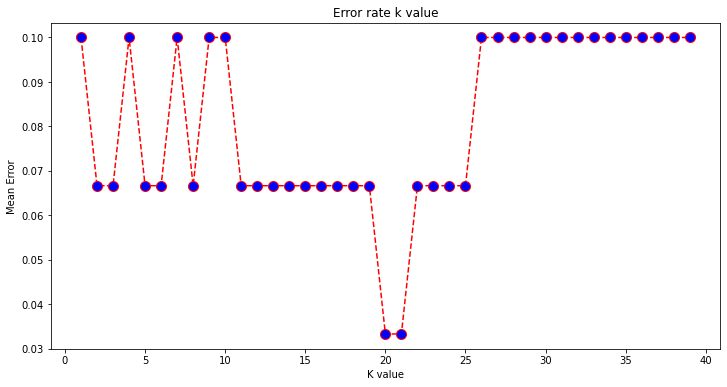

In [65]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error rate k value')
plt.xlabel('K value')
plt.ylabel('Mean Error')